In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
gender_submission=pd.read_csv('gender_submission.csv')
test=pd.read_csv('test.csv')
train=pd.read_csv('train.csv')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
train.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [ ]:
test.columns

Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [ ]:
train.isnull().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,177
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
test.isnull().sum()

,0
PassengerId,0
Pclass,0
Name,0
Sex,0
Age,86
SibSp,0
Parch,0
Ticket,0
Fare,1
Cabin,327


In [ ]:
## data types
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [ ]:
#droping the irrelevant columns: PAssengerid,Name,Tickit,Cabin


train_data=train.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)
test_data=test.drop(['PassengerId','Name','Ticket','Cabin'],axis=1)

print(train_data.head())

   Survived  Pclass     Sex   Age  SibSp  Parch     Fare Embarked
0         0       3    male  22.0      1      0   7.2500        S
1         1       1  female  38.0      1      0  71.2833        C
2         1       3  female  26.0      0      0   7.9250        S
3         1       1  female  35.0      1      0  53.1000        S
4         0       3    male  35.0      0      0   8.0500        S


In [ ]:
#handiling the missiong values

In [ ]:
#seprating the values num cat

train_num=train_data.select_dtypes(exclude='object')
train_cat=train_data.select_dtypes(object)

#test
test_num=test_data.select_dtypes(exclude='object')
test_cat=test_data.select_dtypes(object)

In [ ]:
test_cat

,Sex,Embarked
0,male,Q
1,female,S
2,male,Q
3,male,S
4,female,S
...,...,...
413,male,S
414,female,C
415,male,S
416,male,S


In [ ]:
train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,177
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
pd.DataFrame(train_data['Age'].fillna(train_data['Age'].median(),inplace=True))

/tmp/ipython-input-27-2924621816.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pd.DataFrame(train_data['Age'].fillna(train_data['Age'].median(),inplace=True))


""


In [ ]:
train_data.isnull().sum()

,0
Survived,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,0
Embarked,2


In [ ]:
pd.DataFrame(test_data['Age'].fillna(test_data['Age'].median(),inplace=True))

/tmp/ipython-input-29-1791096258.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pd.DataFrame(test_data['Age'].fillna(test_data['Age'].median(),inplace=True))


""


In [ ]:
test_data.isnull().sum()

,0
Pclass,0
Sex,0
Age,0
SibSp,0
Parch,0
Fare,1
Embarked,0


In [ ]:
pd.DataFrame(train_data['Embarked'].fillna(train_data['Embarked'].mode(),inplace=True))

/tmp/ipython-input-31-3957586389.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  pd.DataFrame(train_data['Embarked'].fillna(train_data['Embarked'].mode(),inplace=True))


""


In [ ]:
train_data['Embarked']=train_data['Embarked'].fillna(train_data['Embarked'].mode()[0])

In [ ]:
#TEst data
test_data['Embarked']=test_data['Embarked'].fillna(test_data['Embarked'].mode()[0])

In [ ]:
train_data['Embarked'].mode()[0]

'S'

In [ ]:
#now seprating categorical columns from nemuricals columns for encoding
cat=train_data.select_dtypes(object)
cat

,Sex,Embarked
0,male,S
1,female,C
2,female,S
3,female,S
4,male,S
...,...,...
886,male,S
887,female,S
888,female,S
889,male,C


In [ ]:
from sklearn.preprocessing import LabelEncoder

#Train data
le=LabelEncoder()
train_data['Sex']=le.fit_transform(train_data['Sex'])
###################################33
#Test data
test_data['Sex']=le.fit_transform(test_data['Sex'])

In [ ]:
train_data['Sex']

,Sex
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [ ]:
#for emark

#Train data
train_data['Embarked']=le.fit_transform(train_data['Embarked'])

#test data

test_data['Embarked']=le.fit_transform(test_data['Embarked'])


In [ ]:
train_data['Embarked']

,Embarked
0,2
1,0
2,2
3,2
4,2
...,...
886,2
887,2
888,2
889,0


In [ ]:
test_data['Embarked']

,Embarked
0,1
1,2
2,1
3,2
4,2
...,...
413,2
414,0
415,2
416,2


In [ ]:
# scaling the numerical values

from sklearn.preprocessing import StandardScaler


ss=StandardScaler()
train_numm=train_data.drop(['Sex','Embarked','Survived'],axis=1)
test_numm=test_data.drop(['Sex','Embarked'],axis=1)
for i in train_numm:
  train_data[i]=ss.fit_transform(train_data[[i]])
for i in test_numm:
  test_data[i]=ss.fit_transform(test_data[[i]])


In [ ]:
train_num.columns

Index(['Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare'], dtype='object')

In [ ]:
test_num.select_dtypes(exclude='object')

,Pclass,Age,SibSp,Parch,Fare
0,3,34.5,0,0,7.8292
1,3,47.0,1,0,7.0000
2,2,62.0,0,0,9.6875
3,3,27.0,0,0,8.6625
4,3,22.0,1,1,12.2875
...,...,...,...,...,...
413,3,NaN,0,0,8.0500
414,1,39.0,0,0,108.9000
415,3,38.5,0,0,7.2500
416,3,NaN,0,0,8.0500


# Feature Selection

In [ ]:
X=train_data.drop(['Survived'],axis=1)
y=train_data['Survived']

test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.873482,1,0.386231,-0.499470,-0.400248,-0.497811,1
1,0.873482,0,1.371370,0.616992,-0.400248,-0.512660,2
2,-0.315819,1,2.553537,-0.499470,-0.400248,-0.464532,1
3,0.873482,1,-0.204852,-0.499470,-0.400248,-0.482888,2
4,0.873482,0,-0.598908,0.616992,0.619896,-0.417971,2
...,...,...,...,...,...,...,...
413,0.873482,1,-0.204852,-0.499470,-0.400248,-0.493856,2
414,-1.505120,0,0.740881,-0.499470,-0.400248,1.312180,0
415,0.873482,1,0.701476,-0.499470,-0.400248,-0.508183,2
416,0.873482,1,-0.204852,-0.499470,-0.400248,-0.493856,2


In [ ]:
#No need to do pca beacouse they already given which columns to take
#from sklearn.decomposition import PCA
#pca=PCA(n_components=4)
#pca.fit(X)

In [ ]:
#eigen values
#pca.explained_variance_

In [ ]:
#pca_data=pca.transform(X)

In [ ]:
#pca_data

In [ ]:
#pca_df=pd.DataFrame((pca_data),columns=['PC1','PC2','PC3','PC4'])
#pca_df['survived']=train_data['Survived']

In [ ]:
#pca_df

In [ ]:
#Selecting the features

Selected_fetures=train_data.drop(['Survived','Parch'],axis=1)

Selected_fetures

,Pclass,Sex,Age,SibSp,Fare,Embarked
0,0.827377,1,-0.565736,0.432793,-0.502445,2
1,-1.566107,0,0.663861,0.432793,0.786845,0
2,0.827377,0,-0.258337,-0.474545,-0.488854,2
3,-1.566107,0,0.433312,0.432793,0.420730,2
4,0.827377,1,0.433312,-0.474545,-0.486337,2
...,...,...,...,...,...,...
886,-0.369365,1,-0.181487,-0.474545,-0.386671,2
887,-1.566107,0,-0.796286,-0.474545,-0.044381,2
888,0.827377,0,-0.104637,0.432793,-0.176263,2
889,-1.566107,1,-0.258337,-0.474545,-0.044381,0


In [ ]:
y

,Survived
0,0
1,1
2,1
3,1
4,0
...,...
886,0
887,1
888,0
889,1


In [ ]:
#Spliting into traning ans testinf sets using train_test_split
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(Selected_fetures,y,test_size=0.2,random_state=42)
print("Training data shape:",X_train.shape)
print("Testing data shape:",X_test.shape)


Training data shape: (712, 6)
Testing data shape: (179, 6)


In [ ]:
X_train

,Pclass,Sex,Age,SibSp,Fare,Embarked
331,-1.566107,1,1.240235,-0.474545,-0.074583,2
733,-0.369365,1,-0.488887,-0.474545,-0.386671,2
382,0.827377,1,0.202762,-0.474545,-0.488854,2
704,0.827377,1,-0.258337,0.432793,-0.490280,2
813,0.827377,0,-1.795334,3.154809,-0.018709,2
...,...,...,...,...,...,...
106,0.827377,0,-0.642586,-0.474545,-0.494391,2
270,-1.566107,1,-0.104637,-0.474545,-0.024246,2
860,0.827377,1,0.894411,1.340132,-0.364355,2
435,-1.566107,0,-1.180535,0.432793,1.767741,2


In [ ]:
X_test

,Pclass,Sex,Age,SibSp,Fare,Embarked
709,0.827377,1,-0.104637,0.432793,-0.341452,0
439,-0.369365,1,0.125912,-0.474545,-0.437007,2
840,0.827377,1,-0.719436,-0.474545,-0.488854,2
720,-0.369365,0,-1.795334,-0.474545,0.016023,2
39,0.827377,0,-1.180535,0.432793,-0.422074,0
...,...,...,...,...,...,...
433,0.827377,1,-0.949986,-0.474545,-0.504962,2
773,0.827377,1,-0.104637,-0.474545,-0.502949,0
25,0.827377,0,0.663861,0.432793,-0.016444,2
84,-0.369365,0,-0.949986,-0.474545,-0.437007,2


In [ ]:
y_train

,Survived
331,0
733,0
382,0
704,0
813,0
...,...
106,1
270,0
860,0
435,1


In [ ]:
y_test

,Survived
709,1
439,0
840,0
720,1
39,1
...,...
433,0
773,0
25,1
84,1


In [ ]:
#Step 4

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,BatchNormalization
from tensorflow.keras.initializers import GlorotUniform




In [ ]:
model=Sequential()
model.add(Dense(64,activation='relu',kernel_initializer=GlorotUniform(),input_shape=(X_train.shape[1],)))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid',kernel_initializer=GlorotUniform()))

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 769 (3.00 KB)

 Trainable params: 641 (2.50 KB)

 Non-trainable params: 128 (512.00 B)

In [ ]:
#Step-5
#loss function:binary_crossentropy
#optimier:adam
#metrics:accuracy

In [ ]:
from re import VERBOSE
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

#Stop early if validation loss doesn't imporve
early_stop=EarlyStopping(patience=5,restore_best_weights=True)

In [ ]:
history=model.fit(
    X_train,y_train,
    epochs=20,
    batch_size=64,
    validation_split=0.2,
    callbacks=[early_stop]
)

Epoch 1/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 2s 38ms/step - accuracy: 0.5748 - loss: 0.7944 - val_accuracy: 0.6084 - val_loss: 0.6650
Epoch 2/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.6737 - loss: 0.6660 - val_accuracy: 0.6853 - val_loss: 0.6258
Epoch 3/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7385 - loss: 0.6062 - val_accuracy: 0.6853 - val_loss: 0.6024
Epoch 4/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7423 - loss: 0.5782 - val_accuracy: 0.6783 - val_loss: 0.5872
Epoch 5/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7412 - loss: 0.5784 - val_accuracy: 0.6783 - val_loss: 0.5763
Epoch 6/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.7428 - loss: 0.5349 - val_accuracy: 0.6783 - val_loss: 0.5666
Epoch 7/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7799 - loss: 0.5090 - val_accuracy: 0.6783 - val_loss: 0.5579
Epoch 8/20
9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7786 - loss: 0.5267 - val_accuracy: 0.6853 - val_loss: 0.5517


In [ ]:
history.history

{'accuracy': [0.5659050941467285,
  0.6731107234954834,
  0.731107234954834,
  0.7574692368507385,
  0.7416520118713379,
  0.7381370663642883,
  0.7644991278648376,
  0.7891036868095398,
  0.7961335778236389,
  0.8014059662818909,
  0.7891036868095398,
  0.790861189365387,
  0.7803163528442383,
  0.7943760752677917,
  0.790861189365387,
  0.7926186323165894,
  0.8101933002471924,
  0.8049209117889404,
  0.7926186323165894,
  0.80843585729599],
 'loss': [0.7520943880081177,
  0.642794668674469,
  0.601306140422821,
  0.5724830627441406,
  0.5841690897941589,
  0.5582944750785828,
  0.5294994711875916,
  0.508074164390564,
  0.5000803470611572,
  0.46741050481796265,
  0.5152985453605652,
  0.4741878807544708,
  0.48092254996299744,
  0.4846034348011017,
  0.45228680968284607,
  0.483989417552948,
  0.4768671989440918,
  0.4806925654411316,
  0.46462470293045044,
  0.4379427433013916],
 'val_accuracy': [0.6083915829658508,
  0.6853147149085999,
  0.6853147149085999,
  0.6783216595649719,

In [ ]:
#evaluate
model.evaluate(X_test,y_test)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - accuracy: 0.7409 - loss: 0.5019


[0.5057375431060791, 0.74301677942276]

In [ ]:
y_pred=(model.predict(X_test)>0.5).astype(int)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


In [ ]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

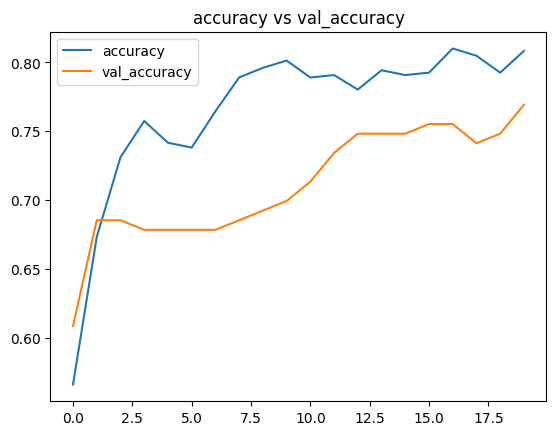

In [ ]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.title('accuracy vs val_accuracy')
plt.legend()
plt.show()

In [ ]:
history.history['accuracy']

[0.5659050941467285,
 0.6731107234954834,
 0.731107234954834,
 0.7574692368507385,
 0.7416520118713379,
 0.7381370663642883,
 0.7644991278648376,
 0.7891036868095398,
 0.7961335778236389,
 0.8014059662818909,
 0.7891036868095398,
 0.790861189365387,
 0.7803163528442383,
 0.7943760752677917,
 0.790861189365387,
 0.7926186323165894,
 0.8101933002471924,
 0.8049209117889404,
 0.7926186323165894,
 0.80843585729599]

In [ ]:
X_train.shape

(712, 6)

In [ ]:
test

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [ ]:
test_data

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.873482,1,0.386231,-0.499470,-0.400248,-0.497811,1
1,0.873482,0,1.371370,0.616992,-0.400248,-0.512660,2
2,-0.315819,1,2.553537,-0.499470,-0.400248,-0.464532,1
3,0.873482,1,-0.204852,-0.499470,-0.400248,-0.482888,2
4,0.873482,0,-0.598908,0.616992,0.619896,-0.417971,2
...,...,...,...,...,...,...,...
413,0.873482,1,-0.204852,-0.499470,-0.400248,-0.493856,2
414,-1.505120,0,0.740881,-0.499470,-0.400248,1.312180,0
415,0.873482,1,0.701476,-0.499470,-0.400248,-0.508183,2
416,0.873482,1,-0.204852,-0.499470,-0.400248,-0.493856,2


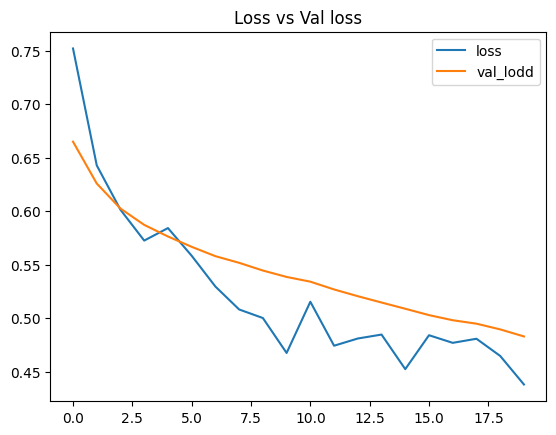

In [ ]:
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_lodd')
plt.title('Loss vs Val loss')
plt.legend()
plt.show()